<a href="https://colab.research.google.com/github/yash16jr/Deep_Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


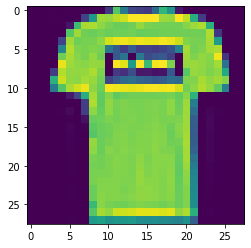

In [5]:
plt.imshow(X_train[1])

In [ ]:
## 

**Preprocessing the data**

In [8]:
X_train = X_train/255
X_test = X_test/255

**Reshaping**


In [10]:
X_train= X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28,28,1))

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid', activation=keras.layers.LeakyReLU(alpha=0.01), input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3, 3),strides = 1, padding = 'valid', activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(Dense(300,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))

model.add(Dense(300, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))


model.add(Dense(300, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))



In [43]:
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [44]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

In [45]:
model_history = model.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_split = 0.33, callbacks = early_stopping)

Epoch 1/1000
1257/1257 [==============================] - 11s 6ms/step - loss: 2.3030 - accuracy: 0.1015 - val_loss: 2.3034 - val_accuracy: 0.0969
Epoch 2/1000
1257/1257 [==============================] - 9s 7ms/step - loss: 2.3031 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.0992
Epoch 3/1000
1257/1257 [==============================] - 9s 7ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0979
Epoch 4/1000
1257/1257 [==============================] - 8s 7ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0979
Epoch 5/1000
1257/1257 [==============================] - 9s 7ms/step - loss: 2.3029 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0969
Epoch 6/1000
1257/1257 [==============================] - 8s 6ms/step - loss: 2.3032 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1012
Epoch 7/1000
1257/1257 [==============================] - 8s 7ms/step - loss: 2.3028 - accuracy: 0.0955 - val_loss: 2.3029 

In [50]:
ev = model.evaluate(X_test,y_test)
ev


313/313 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8894


[0.3259982764720917, 0.8894000053405762]

In [51]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [52]:
accuracy = np.sum(y_pred_labels == y_test) / len(y_test) * 100

In [53]:
accuracy

88.94